In [1]:
# STEP 1: IMPORTS
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# STEP 2: LOAD THE DATA
data = load_breast_cancer()
X = data.data
y = data.target

# STEP 3: SPLIT INTO TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: CREATE PIPELINE
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=10, gamma=0.01))
])

# STEP 5: TRAIN THE MODEL
svm_pipeline.fit(X_train, y_train)

# STEP 6: EVALUATE ON TEST SET
y_pred = svm_pipeline.predict(X_test)

print("🎯 Classification Report:\n", classification_report(y_test, y_pred))
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🎯 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

🧾 Confusion Matrix:
 [[41  2]
 [ 0 71]]


In [2]:
#  Use GridSearchCV to Tune C and gamma

from sklearn.model_selection import GridSearchCV

param_grid = {
    'svm_clf__C': [0.1, 1, 10, 100],
    'svm_clf__gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("🔥 Best Parameters:", grid_search.best_params_)
print("✅ Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............svm_clf__C=0.1, svm_clf__gamma=0.001; total time=   0.0s
[CV] END ...............svm_clf__C=0.1, svm_clf__gamma=0.001; total time=   0.0s
[CV] END ...............svm_clf__C=0.1, svm_clf__gamma=0.001; total time=   0.0s
[CV] END ...............svm_clf__C=0.1, svm_clf__gamma=0.001; total time=   0.0s
[CV] END ...............svm_clf__C=0.1, svm_clf__gamma=0.001; total time=   0.0s
[CV] END ................svm_clf__C=0.1, svm_clf__gamma=0.01; total time=   0.0s
[CV] END ................svm_clf__C=0.1, svm_clf__gamma=0.01; total time=   0.0s
[CV] END ................svm_clf__C=0.1, svm_clf__gamma=0.01; total time=   0.0s
[CV] END ................svm_clf__C=0.1, svm_clf__gamma=0.01; total time=   0.0s
[CV] END ................svm_clf__C=0.1, svm_clf__gamma=0.01; total time=   0.0s
[CV] END .................svm_clf__C=0.1, svm_clf__gamma=0.1; total time=   0.0s
[CV] END .................svm_clf__C=0.1, svm_cl

c:\Users\yuvra\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


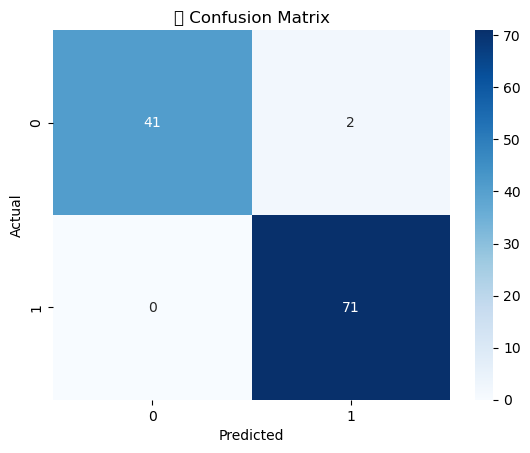

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
# Decision values (distance from boundary)
decision_scores = best_model.decision_function(X_test)

# Show first 5 for demo
print("🧠 Decision Function Scores (first 5):\n", decision_scores[:5])


🧠 Decision Function Scores (first 5):
 [ 0.99368861 -3.79580039 -2.4904044   3.02701371  3.84679241]


In [6]:
import joblib

# Save model
joblib.dump(best_model, "svm_cancer_model.pkl")
print("✅ Model saved!")

# Load model
loaded_model = joblib.load("svm_cancer_model.pkl")
print("✅ Model loaded. Predicting...")

# Use it
print("📊 New Prediction:", loaded_model.predict(X_test[:1]))


✅ Model saved!
✅ Model loaded. Predicting...
📊 New Prediction: [1]
